<a href="https://colab.research.google.com/github/MariamYasser9/Digit_Classifier_Comparison/blob/main/Digit_Classifier_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports & Constants**

In [1]:
!pip install scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# **Dataset Overview**


In [3]:
# Load digits dataset
digits = load_digits()
X_features, y_labels = digits.data, digits.target

# Train-test split
TEST_SIZE = 0.3
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=TEST_SIZE, random_state=RANDOM_STATE
)


In [4]:
print("Keys of the dataset:", digits.keys())
print("Shape of the data:", digits.data.shape)
print("Description of the dataset:\n", digits.DESCR)

Keys of the dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Shape of the data: (1797, 64)
Description of the dataset:
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training se

In [5]:
#display first 5 rows
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# **Data Visualization**

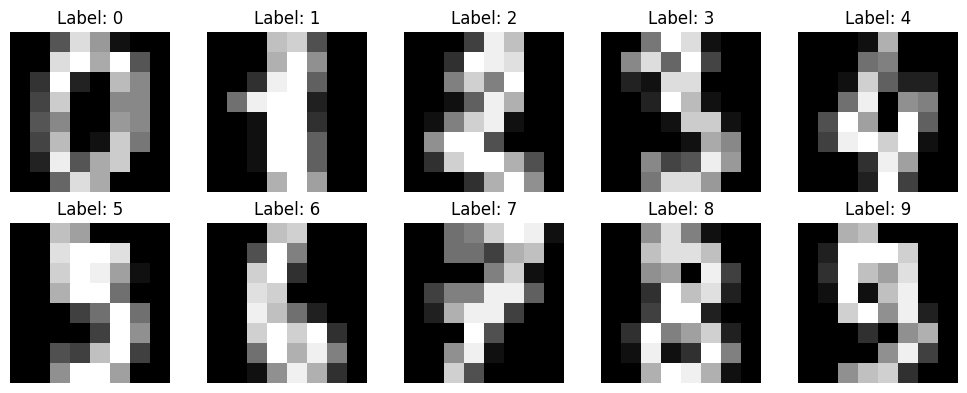

In [6]:
# Number of rows and columns
n_rows, n_cols = 2, 5  # 2 rows, 5 columns = 10 images

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
axes = axes.flatten()  # Make it easy to loop over

for i in range(n_rows * n_cols):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].set_title(f"Label: {digits.target[i]}")
    axes[i].axis('off')  # Hide axis ticks

plt.tight_layout()
plt.show()

# **Model Training and Evaluation Functions**

In [7]:
def train_model(model, X_train, y_train):
    """
    Trains a given scikit-learn model on the provided training data.

    Parameters:
        model : sklearn estimator
            The machine learning model to train.
        X_train : array-like
            Training feature set.
        y_train : array-like
            Training labels.

    Returns:
        model : sklearn estimator
            The trained model.
    """
    model.fit(X_train, y_train)
    return model

# Define models
svc_model = SVC(kernel="rbf", C=10, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)

# Train models
svc_model = train_model(svc_model, X_train, y_train)
tree_model = train_model(tree_model, X_train, y_train)

In [8]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained scikit-learn model on test data.

    Parameters:
        model : sklearn estimator
            The trained machine learning model.
        X_test : array-like
            Test feature set.
        y_test : array-like
            True labels for the test set.

    Returns:
        dict
            Contains accuracy, predictions, classification report, and confusion matrix.
    """
    # Make predictions
    preds = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    return {
        "accuracy": acc,
        "predictions": preds,
        "report": report,
        "confusion_matrix": cm
    }

# Example usage
svc_results = evaluate_model(svc_model, X_test, y_test)
tree_results = evaluate_model(tree_model, X_test, y_test)

print("SVC Accuracy:", svc_results["accuracy"])
print(svc_results["report"])

print("\nDecision Tree Accuracy:", tree_results["accuracy"])
print(tree_results["report"])


SVC Accuracy: 0.9888888888888889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.97      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


Decision Tree Accuracy: 0.8425925925925926
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.74      0.78      0.76        50
 

In [10]:
print(f"SVC Accuracy: {svc_results['accuracy'] * 100:.2f}%")
print(f"Decision Tree Accuracy: {tree_results['accuracy'] * 100:.2f}%")

SVC Accuracy: 98.89%
Decision Tree Accuracy: 84.26%


# **Run & Compare Models**

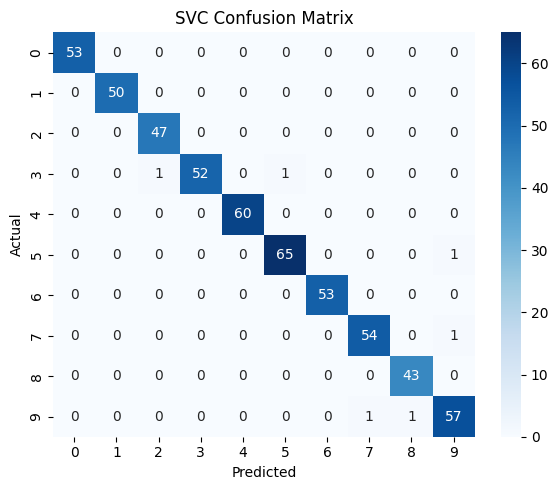

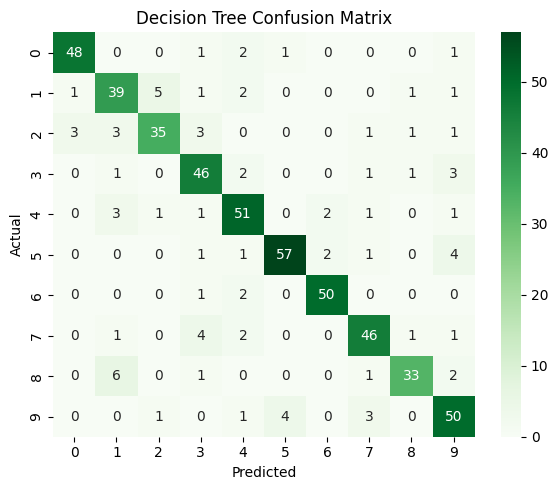

In [11]:
# Define constants for colors
CMAP_SVC = "Blues"
CMAP_TREE = "Greens"

def plot_confusion_matrix(cm, title, cmap, labels):
    """
    Plots a confusion matrix using Seaborn heatmap.

    Parameters:
        cm : ndarray
            Confusion matrix values.
        title : str
            Plot title.
        cmap : str
            Colormap for the heatmap.
        labels : list
            Class labels for axes ticks.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Usage with actual digit names
digit_labels = list(range(10))  # Digits 0–9

plot_confusion_matrix(svc_results["confusion_matrix"],
                      "SVC Confusion Matrix",
                      CMAP_SVC,
                      digit_labels)

plot_confusion_matrix(tree_results["confusion_matrix"],
                      "Decision Tree Confusion Matrix",
                      CMAP_TREE,
                      digit_labels)


# **Save Results**

In [14]:
with open("result.txt", "w") as f:
    f.write("Support Vector Classifier Results:\n")
    f.write(f"Accuracy: {svc_results['accuracy']:.4f}\n")
    f.write(svc_results['report'] + "\n")

    f.write("Decision Tree Classifier Results:\n")
    f.write(f"Accuracy: {tree_results['accuracy']:.4f}\n")
    f.write(tree_results['report'])